<font size=4> Добрый день, Мадина! Меня зовут Алан, будем обмениваться с тобой опытом для успешного прохождения задания! Если не против, предлагаю общаться на ты (иначе дай знать, и перейдем на «вы»). Свои рекомендации буду оформлять в виде комментариев в Markdown ячейках:<br><strong>
    <li> <font color='red'> «❌ красный цвет» </font> – важно исправить или внести пояснения
    <li> <font color='orange'> «⚠️желтый цвет» </font>  – учесть, но можно не исправлять
    <li> <font color='green'> «✔️ зеленый цвет» </font> – все отлично, плюс альтернативные пути решения задачи
    <li>   <font color='steelblue'>«синий цвет» </font> - просто текст комментария
     </strong>
<br> В скобках буду указывать версию комментария. Прошу при внесении правок мои комментарии не удалять, а свои писать в соседних ячейках и выделять удобным цветом. Так коммуникация будет проходить эффективнее 👍.<br>
</font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
RANDOM_STATE = 42
TEST_SIZE = 0.25

# Описание проекта

### Выбор локации для скважины

Допустим, мы работаем в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Нам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Построим модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируем возможную прибыль и риски техникой Bootstrap.

> Нужно решить, где бурить новую скважину. Построить модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализировать возможную прибыль и риски техникой Bootstrap.

**Шаги для выбора локации:**

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.


Описание данных
Данные геологоразведки трёх регионов находятся в файлах: 
/datasets/geo_data_0.csv. Скачать датасет
/datasets/geo_data_1.csv. Скачать датасет
/datasets/geo_data_2.csv. Скачать датасет
id — уникальный идентификатор скважины;
f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
product — объём запасов в скважине (тыс. баррелей).

<div class='alert alert-warning'>⚠️ Вступительную часть многие недооценивают и включают в нее только пару предложений. Вместе с тем прошествии времени оно поможет сориентироваться в работе и восстановить схему своих действий. Поэтому желательно расширить описание



# Загрузка данных

In [2]:
try:
    data0 = pd.read_csv('/datasets/geo_data_0.csv')

    data1 = pd.read_csv('/datasets/geo_data_1.csv')

    data2= pd.read_csv('/datasets/geo_data_2.csv')


except:

    data0 = pd.read_csv('/content/geo_data_0.csv')

    data1 = pd.read_csv('/content/geo_data_1.csv')

    data2= pd.read_csv('/content/geo_data_2.csv')

<div class='alert alert-success'> ✔️Хорошо, что сгруппировала импорты в одной месте для облегчения читабельности кода. try/except тоже к месту для возможности запуска с сервера и локально.
</div>

In [3]:
# Функция получения общей информации о датасете, о дубликатах и пропусках.
def information(df):
    display(df.head());
    df.info();
    print('\nКоличество дубликатов:',df.duplicated().sum(),'\n')
    print('Количество пропусков:\n',df.isna().sum())

In [4]:
information(data0)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Количество дубликатов: 0 

Количество пропусков:
 id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


In [5]:
information(data1)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Количество дубликатов: 0 

Количество пропусков:
 id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


In [6]:
information(data2)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Количество дубликатов: 0 

Количество пропусков:
 id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


Удаляем id, они нам не нужны

In [7]:
data0 = data0.drop(columns=['id'], axis=0)
data1 = data1.drop(columns=['id'], axis=0)
data2 = data2.drop(columns=['id'], axis=0)

<div class='alert alert-success'> ✔️ Хорошо, провела первичный анализ. Добавлю, что в колонке id имеются дубли, однако в этой задаче это не принципиально.
</div>

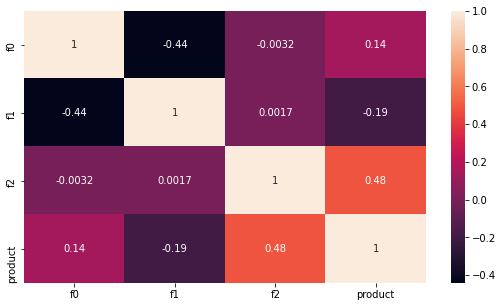

In [8]:
plt.figure(figsize=(9,5))
sns.heatmap(data0.corr(), annot=True);

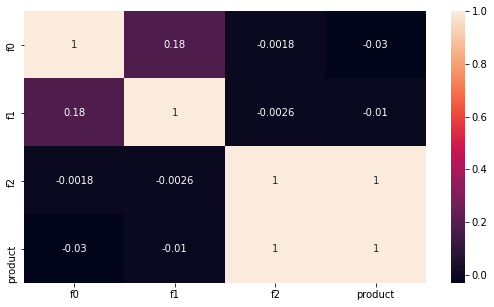

In [9]:
plt.figure(figsize=(9,5))
sns.heatmap(data1.corr(), annot=True);

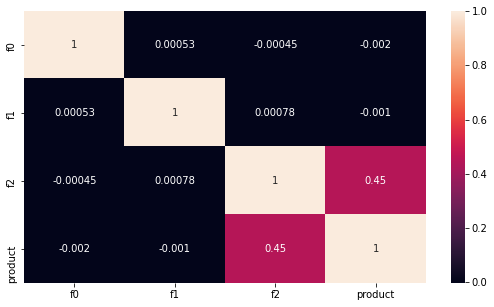

In [10]:
plt.figure(figsize=(9,5))
sns.heatmap(data2.corr(), annot=True);

## Вывод
- Количество строк: 10000
- Пропущенные значения: отсутствуют
- Дубликаты: отсутствуют
- Форматы данных: соответствуют ожиданиям

<div class='alert alert-success'> ✔️Из таблицы корреляции добавить вывод про интересные взаимосвязи некоторых признаков и цели.
</div>

# Обучить и проверить модель для каждого региона

Обучим и проверим модель для data0 региона

In [11]:
features0 = data0.drop(['product'], axis=1)
target0 = data0['product']
# Разделим данные на обучающую и валидационную выборки в соотношении 75:25
features_train0, features_valid0, target_train0, target_valid0 = train_test_split(
    features0, target0, test_size=0.25, random_state=42)
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train0)
features_valid = scaler.transform(features_valid0)
model = LinearRegression()

model.fit(features_train0, target_train0)
predict0 = model.predict(features_valid0)
# Рассчитаем средний запас предсказанного сырья и RMSE модели
mean_predicted_stock0 = np.mean(predict0)
rmse0 = np.sqrt(mean_squared_error(target_valid0, predict0))

print("Средний запас предсказанного сырья:", mean_predicted_stock0)
print("RMSE модели:", rmse0)

Средний запас предсказанного сырья: 92.39879990657768
RMSE модели: 37.75660035026169


In [12]:
features1 = data1.drop(['product'], axis=1)
target1 = data1['product']
# Разделим данные на обучающую и валидационную выборки в соотношении 75:25
features_train1, features_valid1, target_train1, target_valid1 = train_test_split(
    features1, target1, test_size=0.25, random_state=42)
features_train1 = scaler.fit_transform(features_train1)
features_valid1 = scaler.transform(features_valid1)
model.fit(features_train1, target_train1)
predict1 = model.predict(features_valid1)
# Рассчитаем средний запас предсказанного сырья и RMSE модели
mean_predicted_stock1 = np.mean(predict1)
rmse1 = np.sqrt(mean_squared_error(target_valid1, predict1))

print("Средний запас предсказанного сырья:", mean_predicted_stock1)
print("RMSE модели:", rmse1)

Средний запас предсказанного сырья: 68.7128780391376
RMSE модели: 0.8902801001028846


In [13]:
features2 = data2.drop(['product'], axis=1)
target2 = data2['product']
# Разделим данные на обучающую и валидационную выборки в соотношении 75:25
features_train2, features_valid2, target_train2, target_valid2 = train_test_split(
    features2, target2, test_size=0.25, random_state=42)
features_train2 = scaler.fit_transform(features_train2)
features_valid2 = scaler.transform(features_valid2)
model.fit(features_train2, target_train2)
predict2 = model.predict(features_valid2)
# Рассчитаем средний запас предсказанного сырья и RMSE модели
mean_predicted_stock2 = np.mean(predict2)
rmse2 = np.sqrt(mean_squared_error(target_valid2, predict2))

print("Средний запас предсказанного сырья:", mean_predicted_stock2)
print("RMSE модели:", rmse2)

Средний запас предсказанного сырья: 94.77102387765939
RMSE модели: 40.145872311342174


**Выводы**
- **Data0 и Data2:** Высокий RMSE для обоих датасетов свидетельствует о низкой точности модели. Это может быть результатом наличия шума в данных, неполноты данных или несоответствия модели данным.
- **Data1:** Низкий RMSE указывает на высокую точность предсказаний модели, что может быть связано с лучшим качеством данных или их структурой, которая лучше подходит для используемой модели.

<div class='alert alert-warning'>⚠️ Все верно, тут можно сравнить еще и средние запасы, которые так же важны для выбора региона. Также рекомендую в будущем однотипные действия (разбиение на выборки, шкалирование, построение регрессии, вывод метрик) объединять в функции, чтобы избежать описок и сделать код компактнее.  Кстати, шкалирование для класса LinearRegression можно не делать, так как это реализовано по умолчанию.

</div>

# Подготовьтесь к расчёту прибыли


Все ключевые значения для расчётов сохраним в отдельных переменных.


In [14]:
# Ключевые значения
budget = 10000000000  # Бюджет на разработку скважин в регионе
income_per_unit = 450000  # Доход с каждой единицы продукта
n_wells = 200  # количество лучших точек для разработки

In [15]:
# Расчёт безубыточного объёма сырья
break_even_volume = budget / (income_per_unit * n_wells)
print("Достаточный объём сырья для безубыточной разработки (в тыс. баррелей):", break_even_volume)

Достаточный объём сырья для безубыточной разработки (в тыс. баррелей): 111.11111111111111


<div class='alert alert-success'> ✔️Запас скважины для безубыточного бизнеса определен верно. Рекомендовал бы задавать имена констант большими буквами, чтобы удобно было отличать их от переменных, это является соглашением по <a href='https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html'>PEP 8</a>.<br>Также можно задавать большие числа с разделением разрядов, например, 1_000_000
</div>

Для того чтобы покрыть расходы на разработку одной скважины и выйти на безубыточность, необходимо добыть как минимум 111.11 тысяч баррелей сырья. Этот расчёт основан на бюджете разработки скважин в размере 10 млрд рублей и доходе в 450 тысяч рублей за тысячу баррелей.

In [16]:
print("Data0 - Средний запас предсказанного сырья:", mean_predicted_stock0)
print("Data1 - Средний запас предсказанного сырья:", mean_predicted_stock1)
print("Data2 - Средний запас предсказанного сырья:", mean_predicted_stock2)

Data0 - Средний запас предсказанного сырья: 92.39879990657768
Data1 - Средний запас предсказанного сырья: 68.7128780391376
Data2 - Средний запас предсказанного сырья: 94.77102387765939


Все три региона имеют средний запас предсказанного сырья значительно ниже необходимого для безубыточной разработки (111.11 тысяч баррелей). Это указывает на то, что при текущих данных ни один из регионов не гарантирует достаточный объём сырья для покрытия затрат на разработку скважины.

<div class='alert alert-success'> ✔️Да, с точки зрения стратегии случайного выбора нет прибыльного региона
</div>

# Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели

Выберим скважины с максимальными значениями предсказаний

In [17]:
def calculate_profit(predictions, target, n_wells, income_per_unit, budget):
    # 1. Отсортировать предсказанные значения в порядке убывания и выбрать соответствующие индексы
    top_indices = predictions.argsort()[-n_wells:][::-1]

    # 2. Найти целевые значения для выбранных скважин
    selected_targets = target.iloc[top_indices]

    # 3. Рассчитать суммарное целевое значение объёма сырья
    total_volume = selected_targets.sum()

    # 4. Рассчитать прибыль
    profit = total_volume * income_per_unit - budget

    return profit

In [18]:
# Рассчитаем прибыль для каждого региона
profit0 = calculate_profit(predict0, target_valid0, n_wells, income_per_unit, budget)
profit1 = calculate_profit(predict1, target_valid1, n_wells, income_per_unit, budget)
profit2 = calculate_profit(predict2, target_valid2, n_wells, income_per_unit, budget)

In [19]:
print("Прибыль в регионе 0:", profit0)
print("Прибыль в регионе 1:", profit1)
print("Прибыль в регионе 2:", profit2)

Прибыль в регионе 0: 3359141114.462179
Прибыль в регионе 1: 2415086696.681511
Прибыль в регионе 2: 2598571759.374111


# Посчитаем риски и прибыль для каждого региона:

In [20]:
bootstrap_samples = 1000
state = np.random.RandomState(12345)

def bootstrap (target, predictions):
    values = []
    for i in range(bootstrap_samples):
        target_subsample = target.reset_index(drop=True).sample(n=500, replace=True, random_state=state)
        probs_subsample = predictions[target_subsample.index]
        values.append(calculate_profit(probs_subsample, target_subsample, n_wells, income_per_unit, budget))
    values = pd.Series(values)
    mean = values.mean()
    lower = values.quantile(.025)
    upper = values.quantile(.975)
    confidence_interval = (values.quantile(0.025), values.quantile(0.975))

    print("Средняя выручка, млн.руб.:", mean)
    print("Доверительный интервал, минимум:", lower)
    print("Доверительный интервал, максимум:", upper)
    print("Риски убытка:", (values < 0).mean())
    ax=values.plot(kind='hist', bins=10, grid=True)
    ax.set_xlabel('Прибыль, млн.руб.', fontsize=10)
    plt.show()

<div class='alert alert-success'> ✔️Правильно, что сэмплируешь с экземпляром np.random.RandomState  в качестве сида (<a href='https://dzen.ru/a/Y1VcQcfTPHrRmXUi'> тут подробнее </a>), что будет корректным в отличие от использования константы. 
</div>

Средняя выручка, млн.руб.: 406278783.42441905
Доверительный интервал, минимум: -117742136.49486831
Доверительный интервал, максимум: 911737050.7514055
Риски убытка: 0.067


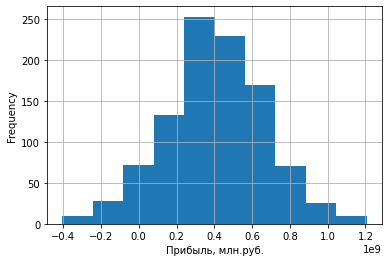

In [21]:
bootstrap(target_valid0, predict0)

Средняя выручка, млн.руб.: 441504277.5922549
Доверительный интервал, минимум: 35728489.280851334
Доверительный интервал, максимум: 828006639.0043902
Риски убытка: 0.016


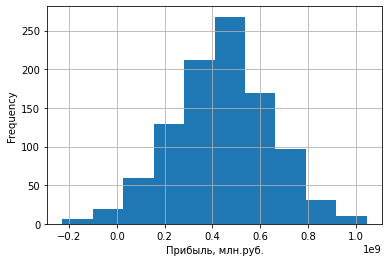

In [22]:
bootstrap(target_valid1, predict1)

Средняя выручка, млн.руб.: 385213195.91415244
Доверительный интервал, минимум: -164785166.1090443
Доверительный интервал, максимум: 888206234.1976783
Риски убытка: 0.078


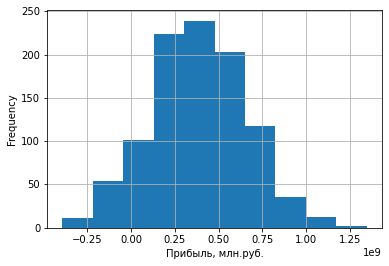

In [23]:
bootstrap(target_valid2, predict2)

# Вывод
**Анализ результатов**

- **Средняя выручка:** Регион 1 имеет наивысшую среднюю выручку, что делает его наиболее прибыльным среди трех регионов.
- **Доверительный интервал:** Регион 1 также имеет положительный нижний предел доверительного интервала, что означает, что даже в наихудшем случае выручка все еще положительна.
- **Риски убытка:** Регион 1 имеет самый низкий риск убытка (1.6%), что делает его наименее рискованным регионом для инвестиций.

**Рекомендация**

На основе анализа, регион 1 является наилучшим выбором для инвестиций, так как он предлагает наивысшую среднюю выручку и минимальный риск убытка. Регион 0 и регион 2 имеют значительно более высокие риски убытка и более широкие доверительные интервалы, что делает их менее привлекательными для инвестиций.

Таким образом, для максимизации прибыли и минимизации рисков, рекомендуется сосредоточить усилия на разработке скважин в регионе 1.

<div class='alert alert-info'>🏁 Отличный выбор региона, как и вся работа! Исследовала и подготовила признаки, корректно выполнила разделение на выборки и построила регрессию, посчитала целевые метрики и определила оптимальный регион с точки зрения прибыли и рисков убытков. Осталось дать обратную связь по выделенным ячейкам (при необходимости).

</div>

<div class='alert alert-success'> <strong>Ревьюер(2)</strong> <br>

Спасибо за сильную работу и удачной учебы, немного активности и все получится!

</div>